In [27]:
#======================================================================
#
#     This routine solves an infinite horizon growth model 
#     with dynamic programming and sparse grids
#
#     The model is described in Scheidegger & Bilionis (2017)
#     https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2927400
#
#     external libraries needed:
#     - IPOPT (https://projects.coin-or.org/Ipopt)
#     - PYIPOPT (https://github.com/xuy/pyipopt)
#     - TASMANIAN (http://tasmanian.ornl.gov/)
#
#     Simon Scheidegger, 11/16 ; 07/17
#======================================================================

import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
from parameters import *                      #parameters of model
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model

import TasmanianSG                            #sparse grid library
import numpy as np
from matplotlib import pyplot as plt


#======================================================================
# Start with Value Function Iteration

# terminal value function
valnew=TasmanianSG.TasmanianSparseGrid()
if (numstart==0):
    valnew, capnew, Vnew=interpol.sparse_grid(n_agents, iDepth)
    valnew.write("valnew_1." + str(numstart) + ".txt") #write file to disk for restart

# value function during iteration
else:
    valnew.read("valnew_1." + str(numstart) + ".txt")  #write file to disk for restart
    
valold=TasmanianSG.TasmanianSparseGrid()
valold=valnew

for i in range(numstart, numits):
    valnew=TasmanianSG.TasmanianSparseGrid()
    valnew, capnew, Vnew=interpol_iter.sparse_grid_iter(n_agents, iDepth, valold)
    valold=TasmanianSG.TasmanianSparseGrid()
    valold=valnew
    valnew.write("valnew_1." + str(i+1) + ".txt")
    
#======================================================================
print( "===============================================================")
print( " " )
print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
print( " " )
print( "===============================================================")
#======================================================================

# compute errors   
avg_err=post.ls_error(n_agents, numstart, numits, No_samples)

#======================================================================
print( "===============================================================")
print( " ")
print( " Errors are computed -- see errors.txt")
print( " ")
print( "===============================================================")
#======================================================================


 
(' Computation of a growth model of dimension ', 2, ' finished after ', 10, ' steps')
 
 
 Errors are computed -- see errors.txt
 


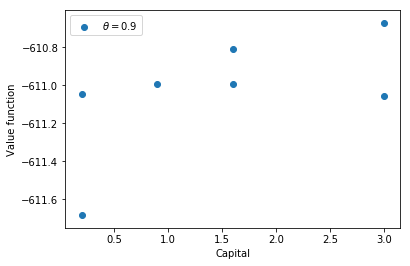

In [28]:
# print value function
plt.scatter(capnew[:,0], Vnew[:,0], label=r'$\theta={}$'.format(theta[0]))
#plt.scatter(capnew[:,0], Vnew[:,1], label=r'$\theta={}$'.format(theta[1]))
#plt.scatter(capnew[:,0], Vnew[:,2], label=r'$\theta={}$'.format(theta[2]))
#plt.scatter(capnew[:,0], Vnew[:,3], label=r'$\theta={}$'.format(theta[3]))
#plt.scatter(capnew[:,0], Vnew[:,4], label=r'$\theta={}$'.format(theta[4]))
plt.xlabel("Capital")
plt.ylabel("Value function")
plt.legend()
plt.show()

In [29]:
Vnew

array([[-610.9945825 , -610.9945825 , -610.9945825 , -610.9945825 ,
        -610.9945825 ],
       [-610.8100961 , -610.8100961 , -610.8100961 , -610.8100961 ,
        -610.8100961 ],
       [-611.68493663, -611.68493657, -611.68493663, -611.68493663,
        -611.68493663],
       [-611.04681815, -611.04681816, -611.04681816, -611.04681816,
        -611.04681816],
       [-611.05431235, -611.05431237, -611.05431236, -611.05431236,
        -611.05431236],
       [-610.67083409, -610.67083409, -610.67083408, -610.67083409,
        -610.67083409],
       [-610.9945825 , -610.9945825 , -610.9945825 , -610.9945825 ,
        -610.9945825 ]])

In [24]:
capnew.shape

(7, 2)